In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


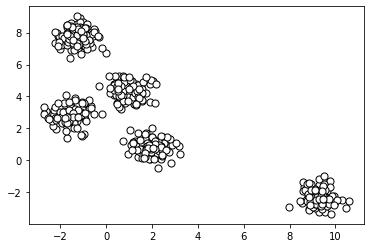

In [174]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=500, n_features=2,
   centers=5, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [175]:
from KMeans import KMeansClustering 

could not convert input data to numpy array
number of classes:  4    207
0    117
1     91
3     85
dtype: int64


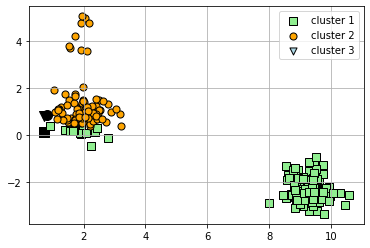

number of classes:  4    175
3    108
0    100
1     82
2     35
dtype: int64


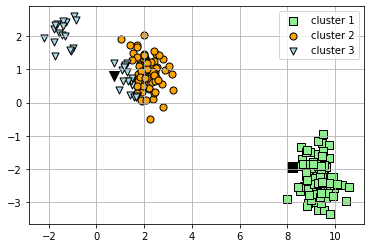

number of classes:  4    117
3    109
0    100
1     98
2     76
dtype: int64


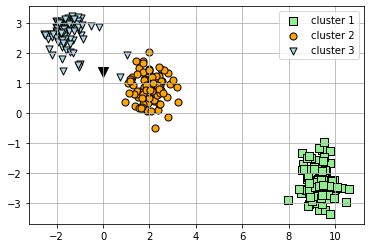

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


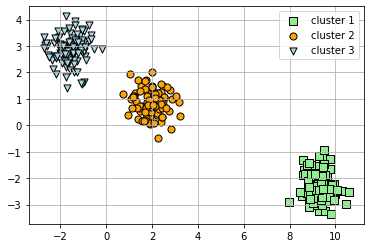

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


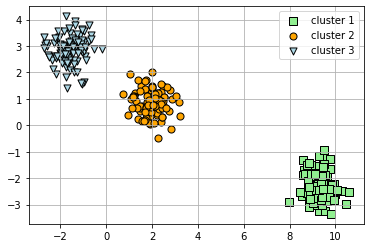

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


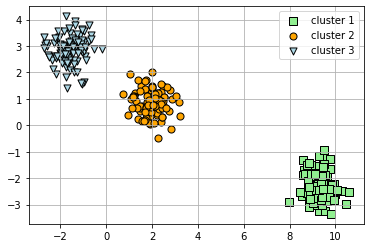

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


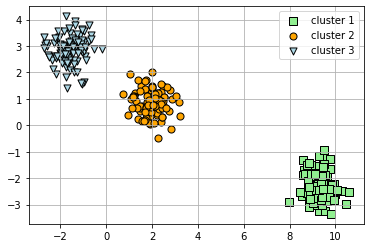

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


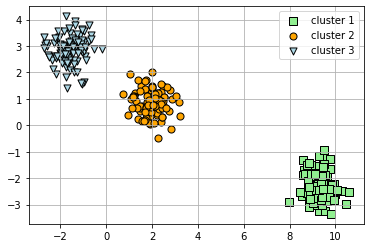

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


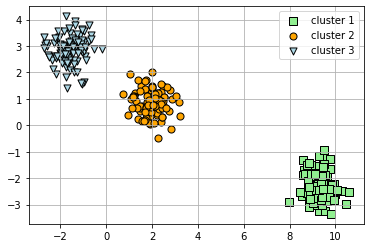

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


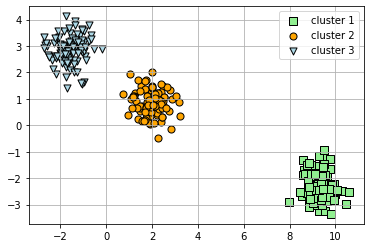

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


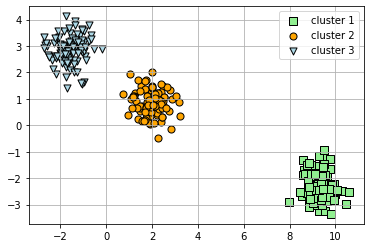

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


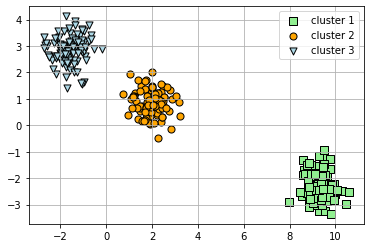

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


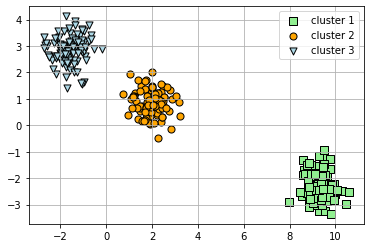

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


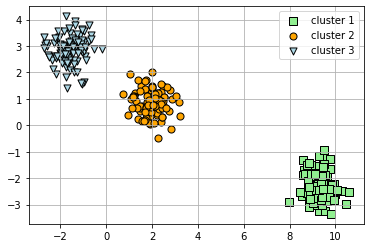

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


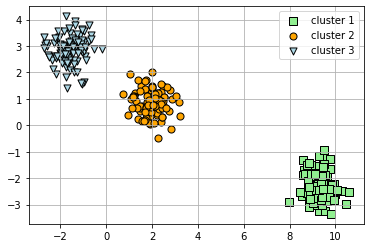

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


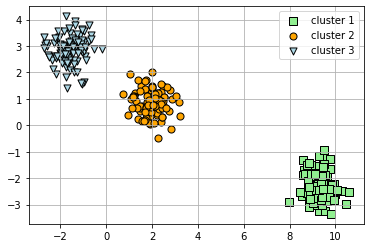

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


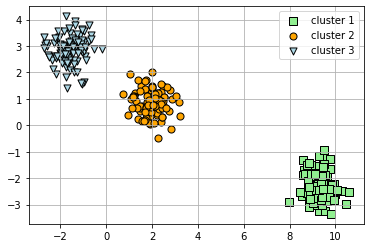

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


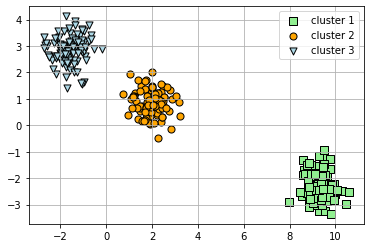

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


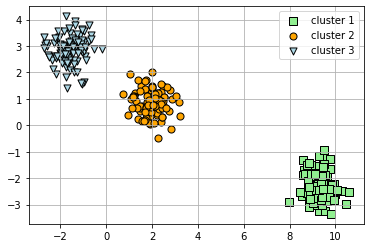

number of classes:  1    100
3    100
2    100
0    100
4    100
dtype: int64


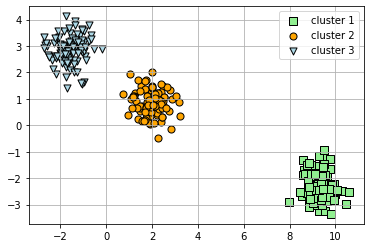

In [176]:
%matplotlib inline
class KMeansClustering:
    def __init__(self, K, initializer = 'random'):
        """
        in model.fit() give the dataframe object directly
        K (int)
        intializer = 'random' or 'KMeans++'
        """
        self.K = K

    def random_initializer(self, shape):
        # shape should be a numpy array of shape [471, 6]
        return 1*np.random.rand(self.K,shape[1])
        # returning K random centroids

    def fit(self, X, max_iter = 20):
        """
        for our purpose X consists of only the mobility points.
        """
        try: 
            X = X.to_numpy()
        except Exception as e:
            print("could not convert input data to numpy array")
        
        
        
        centroids = self.random_initializer(X.shape)
        class_index = None
        log_centroids = np.zeros(shape = [self.K, max_iter, X.shape[1]])
        num_samples = X.shape[0]
        features = X.shape[1]
        for iter in range(max_iter):
            plt.scatter(centroids[0,0], centroids[0,1], marker = 's', edgecolor = 'black', s = 100, c = 'black')
            plt.scatter(centroids[1,0], centroids[1,1], marker = 'o', edgecolor = 'black', s = 100, c = 'black')
            plt.scatter(centroids[2,0], centroids[2,1], marker = 'v', edgecolor = 'black', s = 100, c = 'black')
            
            distances = np.zeros(shape = [num_samples, self.K])
            for i in range(self.K):
                cen = centroids[i].reshape(1,features)
                distances[:,i] = np.sqrt(np.sum((X-cen)**2, axis=1))
            class_index = np.argmin(distances, axis = 1, keepdims=True)
            print("number of classes: ", pd.Series(class_index.flatten()).value_counts())
            
            for j in range(self.K):
                num_samples_in_class_j = np.sum(class_index==j)
                if(num_samples_in_class_j == 0):
                    continue
                      
                centroids[j] = np.sum(X*(class_index==j), axis= 0)/np.sum(class_index==j)
                log_centroids[j][iter] = centroids[j]
                
                
                
                
            predicted_classes = class_index.flatten()
            plt.scatter(
                X[predicted_classes == 0, 0], X[predicted_classes == 0, 1],
                s=50, c='lightgreen',
                marker='s', edgecolor='black',
                label='cluster 1'
            )
            plt.scatter(
                X[predicted_classes == 1, 0], X[predicted_classes == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='cluster 2'
            )

            plt.scatter(
                X[predicted_classes == 2, 0], X[predicted_classes == 2, 1],
                s=50, c='lightblue',
                marker='v', edgecolor='black',
                label='cluster 3'
            )
            plt.legend(scatterpoints=1)
            plt.grid()
            plt.show()
            plt.close()

        return class_index 

    def sum_of_squared_errors(self,data, centroids, classes):
        pass
        
    def plot_transition(self, log_centroids):
        fig, ax = plt.subplots(self.K, 1)
        for i in range(self.K):
            ax[i].plot(log_centroids[i])
            ax[i].set_title(f"K = {i + 1}")
        
        if not os.path.exists("./plots"):
            os.makedirs("./plots")
        plt.savefig(f"./plots/Transitions_in_K={self.K}.png")





model = KMeansClustering(5)
predicted_classes = model.fit(X)

In [172]:
pd.Series(predicted_classes.flatten()).value_counts()

2    167
0    167
1    166
dtype: int64

In [190]:
X[ind].flatten().shape

(2,)

In [191]:
K = 5
centroids = []
ind = np.random.randint(0,X.shape[0],1)
centroids.append(X[ind].flatten())
for i in range(K-1):
    distances = np.zeros(shape = [X.shape[0], len(centroids) ])
    for i in range(len(centroids)):
        cen = np.array(centroids[i]).reshape(1,X.shape[1])
        distances[:,i] = np.sqrt(np.sum((X-cen)**2, axis=1))
    min_dist_from_nearest_cen = np.min(distances, axis = 1)
    next_centroid = X[np.argmax(min_dist_from_nearest_cen)]
    centroids.append(next_centroid)
    print(next_centroid)
print(centroids)
np.array(centroids, dtype = float)
# len(centroids)

[10.44657873 -2.97075018]
[ 2.25479069 -0.48863272]
[-2.34322128  2.1339984 ]
[2.16784247 4.77602707]
[array([-1.71462623,  7.20392584]), array([10.44657873, -2.97075018]), array([ 2.25479069, -0.48863272]), array([-2.34322128,  2.1339984 ]), array([2.16784247, 4.77602707])]


array([[-1.71462623,  7.20392584],
       [10.44657873, -2.97075018],
       [ 2.25479069, -0.48863272],
       [-2.34322128,  2.1339984 ],
       [ 2.16784247,  4.77602707]])

### Implement error metric

In [201]:
classes = np.random.randint(0,2,471).reshape(471,1)


In [202]:
X[np.where(classes == 1)].shape

(235,)

In [215]:
centroids = np.random.rand(3,2)
point = np.array([3,4]).reshape(-1,2)
sumarray = np.sum((centroids - point)**2, axis = 1, keepdims = 1)
np.argmin(sumarray)

0

In [216]:
sumarray

array([[16.15739633],
       [19.93285259],
       [23.5346572 ]])

# Decision Tree implementation

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

## Helper functions

In [108]:
df = pd.read_csv('./data/covid_data_india.csv' ).iloc[:,1:]
df.head()

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,new_cases
0,0.667,1.667,0.000,2.000,3.000,3.000,0.0
1,0.500,1.750,0.000,2.000,3.250,3.000,0.0
2,0.400,1.800,0.200,1.800,2.800,3.200,0.0
3,0.500,2.000,0.000,2.333,3.167,3.333,0.0
4,-0.143,1.714,0.714,1.429,3.571,0.143,0.0


### Train Test Split Function

In [109]:
random.seed(0)

In [110]:
def train_test_split(df, test_size = 10, shuffle = True):
    """
    df = pandas dataframe
    test_size in percentage
    return train_df, test_df
    """
    num_samples = df.shape[0]
    num_test_samples = round(test_size * num_samples / 100)
    num_training_samples = num_samples - num_test_samples
    if shuffle:
        sampled_indexes = np.random.randint(0,num_samples, num_test_samples)
        test_df = df.loc[sampled_indexes]
        train_df = df.drop(sampled_indexes)
        return train_df, test_df

    else:
        train_df = df.loc[:num_training_samples]
        test_df = df.loc[num_training_samples:]
        return train_df, test_df
    
    

In [111]:
train, test = train_test_split(df)
print(train.shape, test.shape)

(428, 7) (47, 7)


## Helper Functions
### Potential Splits

In [112]:
data = df.values
data.shape

(471, 7)

In [113]:
def get_potential_splits(data):
    """
    take data in form of pandas.DataFrame.values
    returns a dictionary where keys are column indexes, and values is the list of all the possible potential splits for that respective key
    """
    potential_splits = dict()
    _, num_cols = data.shape
    for col in range(num_cols - 1): 
        potential_splits[col] = list()
        values = np.unique(data[:,col])
        for i in range(len(values)-1):
            value = np.mean([values[i], values[i+1]])
            potential_splits[col].append(value)
    
    return potential_splits

In [114]:
potential_splits = get_potential_splits(data)
for key in potential_splits.keys():
    print(key, len(potential_splits[key]))

0 261
1 267
2 142
3 269
4 253
5 252


### Split Data

In [115]:
def split_data(data, split_col, split_val):
    """
    data is of form pandas.DataFrame.values
    split_col is the (proposed)optimal col and split_val is the (proposed)value for the split
    returns data_above, data_below
    """
    data_above = data[data[:,split_col] <= split_val]
    data_below = data[data[:,split_col] > split_val]
    return data_above, data_below
    

In [116]:
# let us set some random values for split wrt column 3
split_col = 3
split_val = -50
above, below = split_data(data, split_col, split_val)
print(above.shape, below.shape)

(71, 7) (400, 7)


### Entropy Calculations (Standard Deviation in case of numerical columns)

In [173]:
def calculate_entropy(data):
    """
    data is of form pandas.DataFrame.values. Also data is inclusive of target column
    returns variance and covariance based on the target column
    """
    target = data[:,-1]
    N = len(target)
    average = np.mean(target)
    std_dev = np.std(target)
    covariance = (std_dev/average)*100
    return std_dev, covariance

def calculate_overall_entropy(data_above, data_below):
    """
    input data of form pandas.DataFrame.values
    returns weighted average of entropies of the input tables
    """
    num_samples_above, num_samples_below = len(data_above), len(data_below)
    total_samples = num_samples_above + num_samples_below
    std_above, _ = calculate_entropy(data_above)
    std_below, _ = calculate_entropy(data_below)
    overall_std = (num_samples_above/total_samples)*std_above + (num_samples_below/total_samples)*std_below
    return overall_std


def determine_best_split(data, potential_splits):
    """
    for all columns and for all values of potential splits in every column evaluate 
    the best possible reduction in std_deviation
    """
    best_split_col = None
    best_split_value = None
    std_pre_split, _ = calculate_entropy(data)
    best_std = std_pre_split
    for col in potential_splits.keys():
        for value in potential_splits[col]:
            data_above, data_below = split_data(data, split_col= col, split_val = value)
            std_post_split = calculate_overall_entropy(data_above, data_below)
            if(std_post_split <= best_std):
                best_split_col = col
                best_split_value = value
                best_std = std_post_split
    print("Splitting wrt column {} and value {}; Std Dev reduced from {} to {}".format(best_split_col, best_split_value, std_pre_split, best_std))
    return best_split_col, best_split_value

In [174]:
entropy, covariance = calculate_entropy(data)
print(entropy, covariance)
print("overall Entropy: ", calculate_overall_entropy(above, below))
determine_best_split(data, potential_splits)

89327.94182789268 148.62835507780358
overall Entropy:  89048.98281879938
Splitting wrt column 2 and value 16.857; Std Dev reduced from 89327.94182789268 to 68219.6240586562


/tmp/ipykernel_9424/62782242.py:10: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


(2, 16.857)

### Pending: check_purity() and predict_target()

> There is not check purity function in case of regression. Instead we can set a limit of how many minimum number of samples should remain within the leaf nodes. This serves as a base case. Or we can set a limit at the depth of the tree. This is also considered as a base case only.

In [194]:
def average_of_target_col(data):
    """
    returns the average of the target values of samples in the dataframe
    """
    target = data[:,-1]
    if(len(target)>0):
        return np.mean(target)
    else:
        return 0

In [195]:
# probable: check purity again calculates the entropy of the target column in a given table and if it is less than 
# a certain threshhold std then the column might be deemed pure.

# 

# probable: predict target may return the mean of the values in the target column from a given table.

In [196]:
def decision_tree_regressor(df, df_type = 'pandas', min_samples = 10 ,max_depth = None, depth = 0):
    """
    df_type: (string) either "pandas" or "numpy"
    do not touch the depth parameter. It is being used as a counter within the function.
    when max_depth is an integer then pruning comes into action.
    Otherwise leaf node or not is decided by the minimum number of samples in the data passed
    """
    if df_type == 'pandas':
        global COLUMN_NAMES
        COLUMN_NAMES = df.columns
        data = df.values
    elif df_type == 'numpy':
        data = df
       
    
    # base cases
    if(min_samples < 2): 
        min_samples = 2
    # if no limit is set on max_depth then min_samples will serve as the termination criterion
    if(max_depth == None and len(data) < min_samples):
        return average_of_target_col(data)
    # when max depth is provided, then both max_depth and min_samples serve as the termination criterion
    # to help max_depth functionality perform better set min_samples to 2
    elif(depth == max_depth or len(data) < min_samples):
        return average_of_target_col(data)
    
    # recursive case
    else:
        depth += 1
        
        potential_splits = get_potential_splits(data)
        split_col, split_val = determine_best_split(data, potential_splits)
        data_above, data_below = split_data(data, split_col, split_val)
    
        nodeCondition = "{} <= {}".format(COLUMN_NAMES[split_col], split_val)
        left_child = decision_tree_regressor(data_below,'numpy', min_samples, max_depth, depth)
        right_child = decision_tree_regressor(data_above,'numpy', min_samples, max_depth, depth)
        
        if(left_child == right_child):
            tree = left_child
        else:
            tree = {nodeCondition: [left_child, right_child]}
        
        return tree
    

In [302]:
tree = decision_tree_regressor(train, max_depth = 15, min_samples = 2)

/tmp/ipykernel_9424/62782242.py:10: RuntimeWarning: invalid value encountered in double_scalars
  covariance = (std_dev/average)*100


Splitting wrt column 2 and value 16.5; Std Dev reduced from 89598.46964129583 to 68811.75731855392
Splitting wrt column 4 and value -47.143; Std Dev reduced from 151401.60470515446 to 49361.48069503799
Splitting wrt column 1 and value -30.643; Std Dev reduced from 110454.42966230692 to 74932.15543233647
Splitting wrt column 3 and value -46.7855; Std Dev reduced from 80693.3326923973 to 55584.06814480403
Splitting wrt column 5 and value -38.8575; Std Dev reduced from 38911.093596710525 to 23715.678933846484
Splitting wrt column 5 and value -30.5715; Std Dev reduced from 31905.37594583236 to 13230.390741521313
Splitting wrt column 4 and value -28.143; Std Dev reduced from 17995.5 to 0.0
Splitting wrt column 5 and value -37.7145; Std Dev reduced from 11324.347038129838 to 6112.633066036273
Splitting wrt column 5 and value -32.0715; Std Dev reduced from 7640.79133254534 to 1901.1682263808218
Splitting wrt column 5 and value -36.143; Std Dev reduced from 2534.8909685077624 to 968.3333333333

Splitting wrt column 2 and value 7.785500000000001; Std Dev reduced from 40591.40194194121 to 34259.3283062004
Splitting wrt column 1 and value 10.785499999999999; Std Dev reduced from 40994.90325531734 to 36752.90680260614
Splitting wrt column 2 and value 11.857; Std Dev reduced from 62557.39002318111 to 38387.07445007701
Splitting wrt column 5 and value -24.5; Std Dev reduced from 32601.2915831396 to 17052.958789705623
Splitting wrt column 5 and value -20.143; Std Dev reduced from 15991.32123649853 to 5455.666666666666
Splitting wrt column 5 and value -22.357; Std Dev reduced from 8183.5 to 0.0
Splitting wrt column 5 and value -26.5; Std Dev reduced from 18114.596342912715 to 5779.666666666666
Splitting wrt column 5 and value -25.7145; Std Dev reduced from 8669.5 to 0.0
Splitting wrt column 5 and value -15.5715; Std Dev reduced from 39176.044841023024 to 30954.503898839866
Splitting wrt column 5 and value -11.9285; Std Dev reduced from 17566.04017393477 to 9329.609950912403
Splitting

Splitting wrt column 0 and value -57.357; Std Dev reduced from 30549.88917236462 to 23188.072722477053
Splitting wrt column 4 and value -26.0715; Std Dev reduced from 27499.25026720647 to 20328.345357973405
Splitting wrt column 5 and value -24.857; Std Dev reduced from 118895.5 to 0.0
Splitting wrt column 4 and value -42.286; Std Dev reduced from 18432.82315331905 to 11629.672869690894
Splitting wrt column 3 and value -28.643; Std Dev reduced from 9483.841980435805 to 5907.172418596286
Splitting wrt column 4 and value -39.286; Std Dev reduced from 6075.948773413323 to 4465.094320129666
Splitting wrt column 0 and value -29.6425; Std Dev reduced from 4817.855636317672 to 4080.7246022741438
Splitting wrt column 4 and value -37.714; Std Dev reduced from 4211.873011697607 to 3399.004644439506
Splitting wrt column 3 and value -16.9285; Std Dev reduced from 3904.313051276353 to 3254.4438793756744
Splitting wrt column 2 and value 9.3575; Std Dev reduced from 2746.795985780524 to 136.5096150459

Splitting wrt column 4 and value -3.357; Std Dev reduced from 20.343533985028266 to 8.589361166552983
Splitting wrt column 4 and value 2.2859999999999996; Std Dev reduced from 7.244984190346267 to 4.57087050165033
Splitting wrt column 5 and value 3.2665; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value 3.1; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value 2.7145; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 4 and value 3.125; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value 1.2859999999999998; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value -0.21399999999999997; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value -0.714; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 5 and value -0.9285; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 4 and value 3.4284999999999997; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 4 and value 3.0; Std Dev reduced from 0.0 to 0.0
Splitting wrt column 3 a

In [198]:
tree

{'residential <= 16.5': [{'parks <= -47.143': [282960.21428571426, 6165.746268656716]}, {'residential <= 7.785500000000001': [50338.97637795276, 7576.923076923077]}]}

### predict_sample()

In [303]:
def predict_sample(sample, tree):
    nodeCondition = list(tree.keys())[0]
    attribute, comparator, value = nodeCondition.split(" ")
    if(sample[attribute] <= float(value)):
        answer = tree[nodeCondition][1]
    else:
        answer = tree[nodeCondition][0]

    if isinstance(answer, dict):
        subtree = answer
        return predict_sample(sample, subtree)

    else: 
        return answer    


### Evaluate model performance

In [306]:
def rmse(df, tree):
    """data can be both train or test"""
    predicted = df.apply(predict_sample, axis = 1, args = (tree,))
    actual_values = df.loc[:,"new_cases"]
    rmse = np.sqrt(np.mean((predicted - actual_values)**2))
    return rmse

def r_squared(df, tree):
    predicted_values = df.apply(predict_sample, axis = 1, args = (tree,))
    actual_values = df.loc[:,"new_cases"]
    correlation_matrix = np.corrcoef(predicted_values, actual_values)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    return r_squared

In [307]:
print("Training rmse: {}".format(rmse(train, tree)))
print("Test Rmse: {}".format(rmse(test, tree)))
print("Training r_squared: {}".format(r_squared(train, tree)))
print("Test r_squared: {}".format(r_squared(test, tree)))

Training rmse: 317.41461689514483
Test Rmse: 11139.43485875981
Training r_squared: 0.9999874497418116
Test r_squared: 0.9856167755656888


In [312]:
predicted_values = test.apply(predict_sample, axis = 1, args = (tree,)).sort_index()
actual_values = test.loc[:,"new_cases"].sort_index()

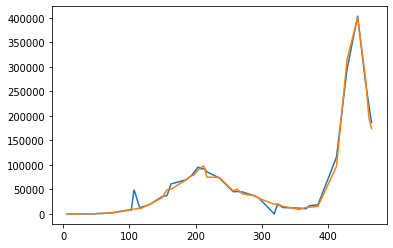

In [314]:
plt.plot(predicted_values)
plt.plot(actual_values)

<AxesSubplot:>

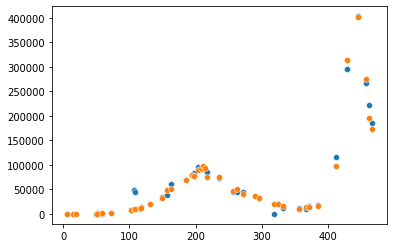

In [315]:
sns.scatterplot(y = predicted_values.values, x = predicted.index)
sns.scatterplot(y = actual_values.values, x = actual_values.index)

In [288]:
predicted.shape, actual_values.shape

((47,), (47,))

11061.858372785942

In [295]:
correlation_matrix = np.corrcoef(predicted, actual_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.9858723473262179
